# Spectrogram Reading Lecture 8: Nasals
1. Voiced vs. Unvoiced Nasals and Yupik
2. A Speech Production Model
3. Examples from Wikipedia


## Voiced vs. Unvoiced Nasals

Nasals are produced with the soft palate open.  Therefore, its place of articulation must be downstream from the soft palate.  The farthest-back place of articulation is uvular (/ɴ/), but it looks like the most common nasals are the four that are used in English and Spanish: labial, coronal, palatal and velar  (/m/,/n/,/ɲ/,/ŋ/).  

Nasals can be voiced or unvoiced, but in both cases, they are called [+sonorant].  That's because air pressure doesn't rise inside the vocal tract; there is no obstruction.

Languages like Hmong and Yupik have unvoiced nasals, such as /m̥/ (in the word "Hmong"), /n̥/ (in the example below), and /ŋ̊/.  YouTube will give us an example of the word "Hmong," and Lane Schwartz will give us an example of the unvoiced /n/ from the Yupik language.

First, download http://courses.engr.illinois.edu/ece590sip/sp2018/spectrogram.py again, because I've added some functions that will save us a little bit of typing.

In [1]:
import spectrogram as sg
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Download three Yupik sample utterances
data1, fs1 = sg.download_audio('http://courses.engr.illinois.edu/ece590sip/sp2018/clip_2_3.26_5.09.wav')
data2, fs2 = sg.download_audio('http://courses.engr.illinois.edu/ece590sip/sp2018/clip_26_93.81_94.68.wav')
data3, fs3 = sg.download_audio('http://courses.engr.illinois.edu/ece590sip/sp2018/clip_36_152.88_155.08.wav')
# Save them locally
sf.write('yupik1.wav',data1,fs1)
sf.write('yupik2.wav',data2,fs2)
sf.write('yupik3.wav',data3,fs3)


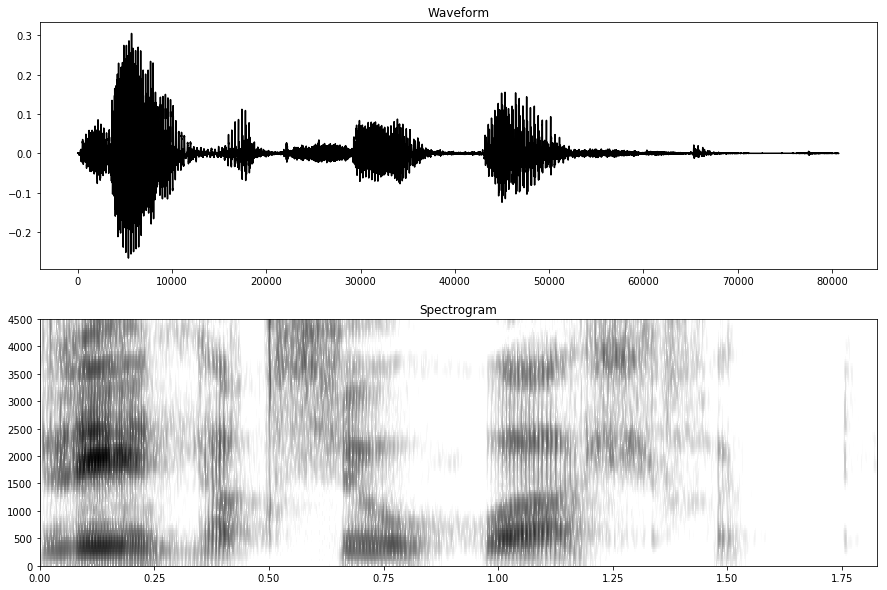

In [8]:
(S1,Ext1)=sg.readable_spectrogram(data1,fs1)
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(data1,'k')
plt.title('Waveform')
plt.subplot(212)
im1=plt.imshow(S1,origin='lower',extent=Ext1,aspect='auto')
im1.set_cmap('Greys')
plt.title('Spectrogram')


This sentence is something like /li n̥ɑq su ʍɑ ɬɪk/.  
* There is an unvoiced nasal from 0.25 to 0.35
* There is a pharyngeal stop from 0.4 to 0.5
* There is an unvoiced labial glide from 0.85 to 0.95
* There is an unvoiced lateral alveolar fricatives from 1.20 to 1.45.  Actually I'm not convinced if this is just one fricative, or two fricatives in a row.

#### Hmong: downloading an audio clip from YouTube

Now let's get an example of an unvoiced /m/, from the name of the Hmong language.  There are two videos on YouTube called "How to pronounce the word Hmong."  One of them pronounces the name with an /h/ followed by a voiced /m/, the other uses a real unvoiced /m/.  I'm not sure if the first one is just an Americanized version of the word, or if this is a dialect difference among dialects of Hmong.  In any case, let's download the second one.

I haven't found any purely python way to do this (I know it's possible, but it looks really complicated).  Instead, make sure you have youtube_dl and ffmpeg installed as command line tools, then try the following.

Actually, the following code fails for me; apparently I have ffmpeg available in bash, but not available in Windows.  So in that case, just go to the bash shell and enter these same commands, so that you get the file "hmong.wav".

In [4]:
from subprocess import call
command1 = "youtube-dl https://www.youtube.com/watch?v=_G6AkZn_yJU --id -x"
command2 = "ffmpeg -i _G6AkZn_yJU.m4a hmong.wav"
call(command1.split(),shell=False)
call(command2.split(),shell=False)

FileNotFoundError: [WinError 2] The system cannot find the file specified

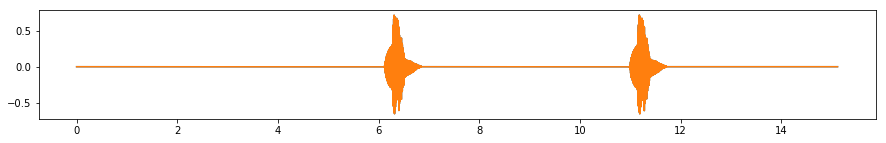

In [7]:
(hmong,fs)=sf.read('hmong.wav')
plt.figure(figsize=(15,2))
plt.plot(np.linspace(0,len(hmong)/fs,len(hmong)),hmong)

As you can see, the audio is mostly silent, except that the word "Hmong" is uttered twice: once from 6.0 to 7.0 seconds, once from 11.0 to 12.0 seconds.  Let's cut out one of those examples and look at it.

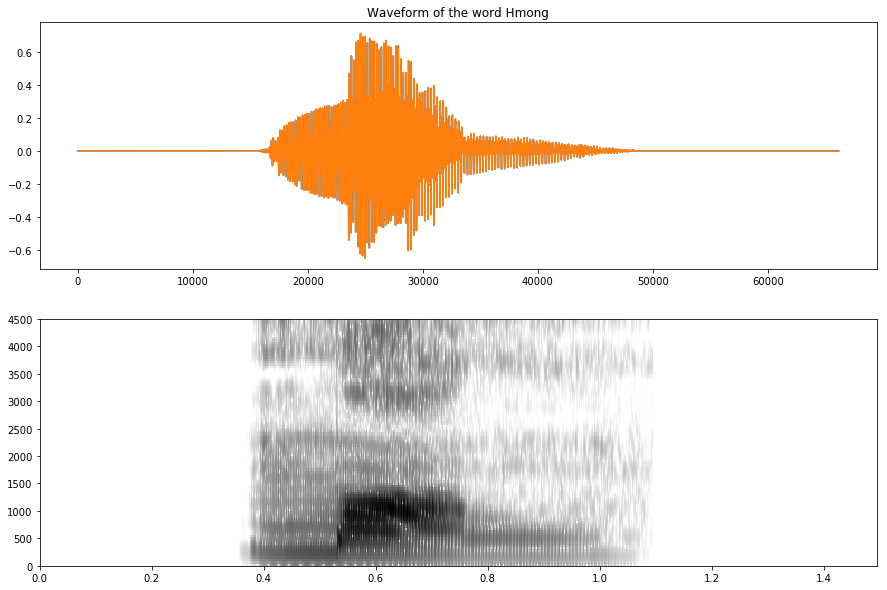

In [12]:
x = hmong[int(fs*5.75):int(fs*7.25)]
S,E=sg.readable_spectrogram(x,fs)
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(x)
plt.title('Waveform of the word Hmong')
plt.subplot(212)
im1=plt.imshow(S,extent=E,origin='lower',aspect='auto')
im1.set_cmap('Greys')

## 2. Speech Production Model

### 2.1  During the nasal closure

During the nasal closure, nothing interesting happens.  Your nose is pretty much always exactly the same shape inside, unless you catch cold.

### 2.2 Immediately preceding and immediately following the nasal closure

The nasal closure is made by pinching off the vocal tract at some position.  Immediately before the nasal closure, the formant frequencies approach the separate resonant frequencies of the front and back cavity. 

#### Resonant frequencies of the front cavity

The resonant frequencies of the front cavity are 
$$F_{fn} = \frac{c}{4L_f} + (n-1)\frac{c}{2L_f}$$
where $L_f$ is the length of the front cavity.

#### Resonance of the constriction

If the tongue constriction has a length of $L_c$, its resonant frequencies are
$$F_{cn}=(n-1)\frac{c}{2L_c}$$ 

#### Resonant frequencies of the back cavity

The resonant frequencies of the back cavity are
$$F_{bn} = (n-1)\frac{c}{2L_b}$$
where $L_b$ is the length of the back cavity.  Yes, the lowest resonance really does go to $F_1=0$.

#### Putting it together

The total length of the vocal tract varies from $L_{tot}=L_f+L_c+L_b\approx 15$cm to $L_{tot}=L_f+L_c+L_b\approx 18$cm, depending on the person.  The value $L_{tot}=17.7$cm is particularly convenient, because it means that $c/2L_{tot}=1000$Hz.  That would be a pretty large man, though; most people have $c/2L_{tot}$ a little higher than that.

The formants are created by sorting the resonances of front and back cavity, in order of increasing frequency.



### Example: /m/ and /ɱ/

For an /m/ or /ɱ/, there is no front cavity.  The back cavity has a length equal to the total length of the vocal tract.  Let's say that's $L_b=17.7$cm, and $c=35400$cm/s.  Then the formant frequencies immediately before closure of the /m/, and immediately after release, are
$$F_n = (n-1)\frac{c}{2L}=(n-1)1000$$
So the formants are $F_1=0$, $F_2=1000$, $F_3=2000$, etc.  In other words, all of the vowel formants drop down to their "closed-lip" values: 0, 1000, 2000, and so on.

### Example: /n/ and /ɲ/
For an /n/, the front cavity length is about $L_f=2$cm, the constriction is a long narrow tongue constriction of about $L_c=4.5$cm, and the back cavity length is around $L_b=11$cm.  So there's only one front-cavity resonance that matters, and it's the same as for an /s/: it is $F_b = 4500$Hz.  The resonances of the constriction and of the back cavity are
$$F_{cn}=(n-1)\frac{c}{2L_c}=(n-1)3900$$
$$F_{bn}=(n-1)\frac{c}{2L_b} = (n-1)1600$$
So the back cavity resonances are at 0, 1600, 3200, 4800Hz and so on.  The front cavity resonance is 4500Hz, the constriction resonance is at 3900Hz.  Putting them together, we get
$$F_1=0$$
$$F_2=1600$$
$$F_3=3200$$
$$F_4=3900$$
$$F_5=4500$$
$$F_6=4800$$

#### /n/
The $F_2$ at 1600Hz is the most reliable sign that the vocal tract is moving toward an alveolar constriction, for /n/, /s/, /t/, or /d/.  It's remarkably consistent, across people and across contexts.

The very high value of $F_3$ (around 3200Hz!!) is the second most reliable sign that the vocal tract is moving toward an alveolar constriction.  It's the only place of articulation in English that causes $F_3$ to go UP, instead of going down.

#### /ɲ/
Exactly the same arguments hold for the palatal nasal /ɲ/, except that the back cavity is even shorter, so the value of $F_2$ is much higher -- always above 2000Hz.

### Example: /ŋ/
For an /ŋ/, the front cavity length is about $L_f=5$cm, the back cavity is $L_b=10cm$, and the constriction takes up what's left.  The unique feature of velar articulations (/ŋ/,/k/, and /g/) is that the back cavity is twice the length of the front cavity, which means they have the same first resonance.
$$F_{fn} =\frac{c}{4L_f}+(n-1)\frac{c}{2L_f}=1770+(n-1)3540$$
$$F_{bn}=(n-1)\frac{c}{2L_b}=(n-1)1770$$
Putting it together, we get
$$F_1=0$$
$$F_2=1770$$
$$F_3=1770$$
$$F_4=3540$$
$$F_5=5310$$

The "velar pinch", the convergence of $F_2$ and $F_3$ to the same frequency, is the most reliable sign that the vocal tract is moving toward a velar constriction.

### Example: /ɴ/

The uvular nasal is kind of rare in world languages, because it's hard to make.  But it's cool from a speech production point of view.  Basically, there is no back cavity.  The entire pharynx is constricted, so we have $L_c\approx 8.5$cm, and $L_f\approx 8.5$cm.

When there is no back cavity, that means that the back of the constriction is no longer open, so it no longer acts as a half-wave resonator.  Instead, we have a constriction that's closed in back, and open in front, so it acts as a quarter-wave resonator, just like the front cavity.  So we have
$$L_{cn} = \frac{c}{4L_c}+(n-1)\frac{c}{2L_c} = 1000+(n-1)2000$$

From the point of view of the front cavity, the constriction looks closed.  So the front cavity is ALSO closed in back, open in front.  So it has
$$L_{fn} =\frac{c}{4L_f}+(n-1)\frac{c}{4L_f}=1000+(n-1)2000$$

Putting it all together, we have
$$F_1=1000$$
$$F_2=1000$$
$$F_3=3000$$
$$F_4=3000$$
$$F_5=5000$$
$$F_6=5000$$

So there's a "uvular pinch", just like the velar pinch, except that this time, it's $F_1$ and $F_2$ that pinch together (at about 1000Hz).  

$F_3$, instead of pinching together with $F_2$ as in a velar /g/, goes up to 3000Hz as in an alveolar /d/.  So if you weren't noticing $F_1$ and $F_2$, you might think this was an alveolar nasal, an /n/.  But $F_1$ and $F_2$ give it away: $F_1$ stays ridiculously high (at around 1000Hz), and $F_2$ stays ridiculously low (at around 1000Hz). 

## 3. Examples from Wikipedia

OK, let's look at some examples from wikipedia.

In [7]:
import soundfile as sf
import io
import urllib.request as request
consonant_pathnames = {
    'm' : 'a/a9/Bilabial_nasal',
    'ɱ' : '1/18/Labiodental_nasal',
    'n' : '2/29/Alveolar_nasal',
    'ɲ' : '4/46/Palatal_nasal',
    'ŋ' : '3/39/Velar_nasal',
    'ɴ' : '3/3e/Uvular_nasal'
}
    
consonant_waves = {}

for c_ipa,c_pathname in consonant_pathnames.items():
    c_url = 'https://upload.wikimedia.org/wikipedia/commons/{}.ogg'.format(c_pathname)
    try:
        req = request.urlopen(c_url)
    except request.HTTPError:
        print('Unable to download {}'.format(c_url))
    else:
        c_wav,c_fs = sf.read(io.BytesIO(req.read()))
        c_filename = c_ipa + '.wav'
        sf.write(c_filename,c_wav,c_fs)
        consonant_waves[c_ipa] = c_wav

print('Donwnloaded these phones: {}'.format(consonant_waves.keys()))

Donwnloaded these phones: dict_keys(['m', 'ɱ', 'n', 'ɲ', 'ŋ', 'ɴ'])


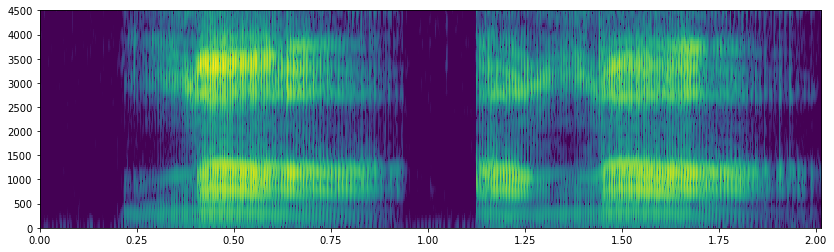

In [11]:
use_this_consonant = 'ɴ'
(x_sgram,x_extent)=sg.readable_spectrogram(consonant_waves[use_this_consonant], c_fs)
plt.figure(figsize=(14,4))
plt.imshow(x_sgram,origin='lower',extent=x_extent,aspect='auto')